**Isolation Forest**

In [ ]:
!pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
import lasio as ls

In [ ]:
well = ls.read(r'15_9-15.las')
df = well.df()

In [ ]:
df.describe()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,BS,DCAL,MUDWEIGHT,ROP,RDEP,RSHA,RMED,...,DTC,NPHI,PEF,GR,RHOB,DRHO,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,17858.000000,17717.000000,17780.000000,20342.000000,17802.000000,18750.000000,19843.000000,19930.000000,19930.000000,19930.000000,...,20393.000000,13497.000000,17855.000000,20349.000000,17672.000000,17780.000000,19930.000000,19930.000000,1.993000e+04,19930.000000
mean,1.140105,60741.258565,13.985696,14.537923,13.237806,0.147665,36.442779,1.513598,1.531790,1.531790,...,131.382896,0.384000,4.124406,58.648870,2.136505,0.029315,1686.436000,436809.904602,6.463001e+06,-1661.270084
std,0.460785,13654.294070,3.867379,6.052077,343.740075,0.018167,35.334429,1.301238,1.505775,1.505775,...,40.525116,0.151967,8.286585,29.070307,0.223194,0.052223,874.522845,6.964533,1.085631e+01,874.359112
min,1.000000,30000.000000,7.325138,8.500000,-12.215459,0.130611,1.106246,0.264479,0.382527,0.382527,...,7.415132,0.039013,1.525528,6.024419,1.438999,-0.134560,171.832001,436790.843750,6.462990e+06,-3175.460938
25%,1.000000,65000.000000,11.983960,12.250001,-0.172839,0.136602,19.776311,0.776997,0.804591,0.804591,...,89.550194,0.248683,2.405467,39.412781,1.979122,-0.014712,929.134003,436805.968750,6.462992e+06,-2418.431030
50%,1.000000,65000.000000,13.917934,12.250001,0.766373,0.140197,31.531178,1.176249,1.160720,1.160720,...,145.276581,0.449095,2.923824,62.378670,2.043714,0.022512,1686.435974,436812.218750,6.462995e+06,-1661.362488
75%,1.000000,65000.000000,17.314291,17.500000,2.249962,0.144990,47.893143,1.668582,1.499787,1.499787,...,158.862198,0.510194,4.275376,75.984383,2.335672,0.062129,2443.737915,436815.281250,6.463012e+06,-904.116486
max,3.000000,99000.000000,25.717396,36.000000,10006.789063,0.191722,1088.967407,14.046203,20.911963,20.911963,...,207.382553,0.733152,365.575592,804.298950,2.648847,0.233342,3201.040039,436818.218750,6.463021e+06,-146.832001


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20954 entries, 25.0 to 3209.856
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  17858 non-null  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   17717 non-null  float64
 2   CALI                               17780 non-null  float64
 3   BS                                 20342 non-null  float64
 4   DCAL                               17802 non-null  float64
 5   MUDWEIGHT                          18750 non-null  float64
 6   ROP                                19843 non-null  float64
 7   RDEP                               19930 non-null  float64
 8   RSHA                               19930 non-null  float64
 9   RMED                               19930 non-null  float64
 10  RXO                                20954 non-null  float64
 11  SP                                 20954 non-n

In [ ]:
df = df.dropna()

In [ ]:
anomaly_inputs = ['NPHI', 'RHOB']

In [ ]:
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [ ]:
model_IF.fit(df[anomaly_inputs])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

In [ ]:
df.loc[:, ['NPHI', 'RHOB','anomaly_scores','anomaly'] ]

,NPHI,RHOB,anomaly_scores,anomaly
DEPT,,,,
1149.648,0.541850,2.063168,0.074719,1
1149.800,0.545401,2.051136,0.088644,1
1149.952,0.548953,2.041540,0.093473,1
1150.104,0.549356,2.035698,0.094214,1
1150.256,0.543351,2.029099,0.100305,1
...,...,...,...,...
3198.152,0.257656,2.391858,0.096132,1
3198.304,0.264047,2.408428,0.080827,1
3198.456,0.269605,2.432385,0.076985,1


In [ ]:
def outlier_plot(data, outlier_method_name, x_var, y_var,
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):

    print(f'Outlier Method: {outlier_method_name}')

    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'

    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11959
Total Number of Values: 13288


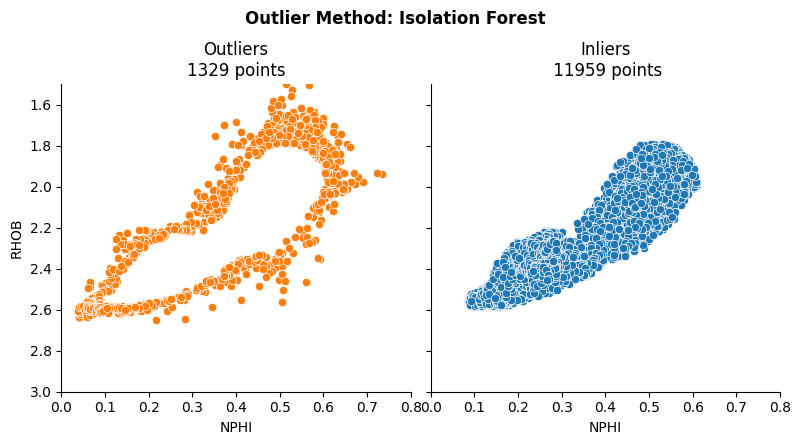

In [ ]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

**Increasing Isolation Forest Contamination Value**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 3987
Number of non anomalous values  9301
Total Number of Values: 13288


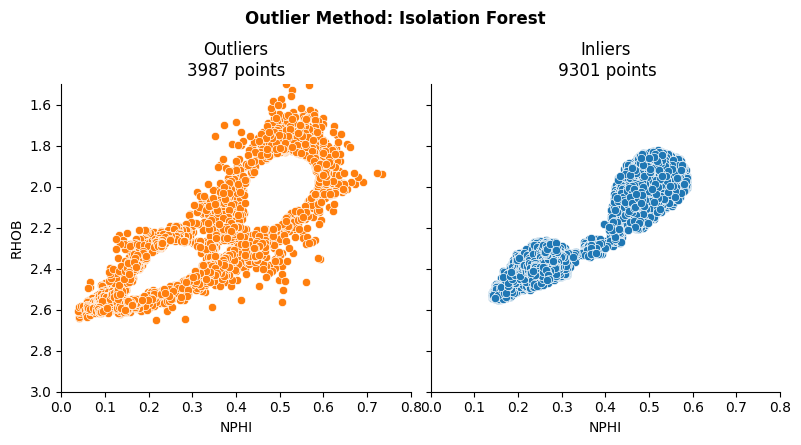

In [ ]:
model_IF = IsolationForest(contamination=float(0.3), random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

**How do we know which contamination value to set?**

Setting the contamination value allows us to identify what percentage of values should be identified as outliers, but choosing that value can be tricky.

There are no hard and fast rules for picking this value, and it should be based on the domain knowledge surrounding the data and its intended application(s).

For this particular dataset, which I am very familiar with, I would consider other features such as borehole caliper and delta-rho (DRHO) to help identify potentially poor data.

**Using More Features for Isolation Forest**

In [ ]:
df.columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'BS', 'DCAL', 'MUDWEIGHT', 'ROP', 'RDEP', 'RSHA', 'RMED', 'RXO',
       'SP', 'DTC', 'NPHI', 'PEF', 'GR', 'RHOB', 'DRHO', 'DEPTH_MD', 'X_LOC',
       'Y_LOC', 'Z_LOC', 'anomaly_scores', 'anomaly'],
      dtype='object')

In [ ]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Outlier Method: Isolation Forest
Number of anomalous values 1329
Number of non anomalous values  11959
Total Number of Values: 13288


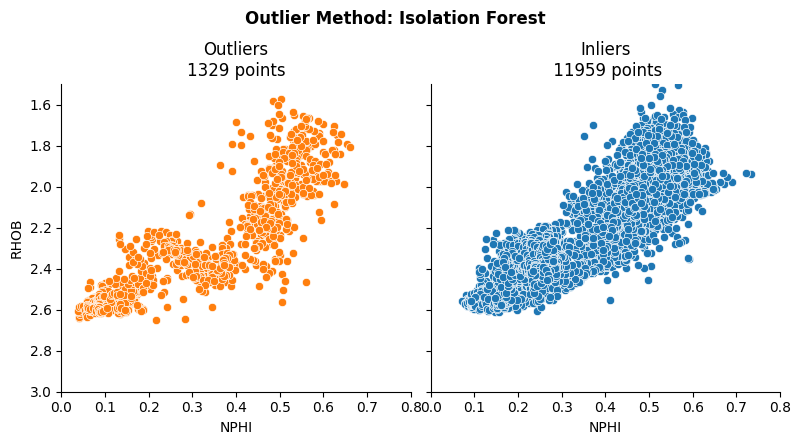

In [ ]:
outlier_plot(df, 'Isolation Forest', 'NPHI', 'RHOB', [0, 0.8], [3, 1.5]);

Instead of just looking at two of the variables, we can look at all of the variables we have used. This is done by using the seaborn pairplot.

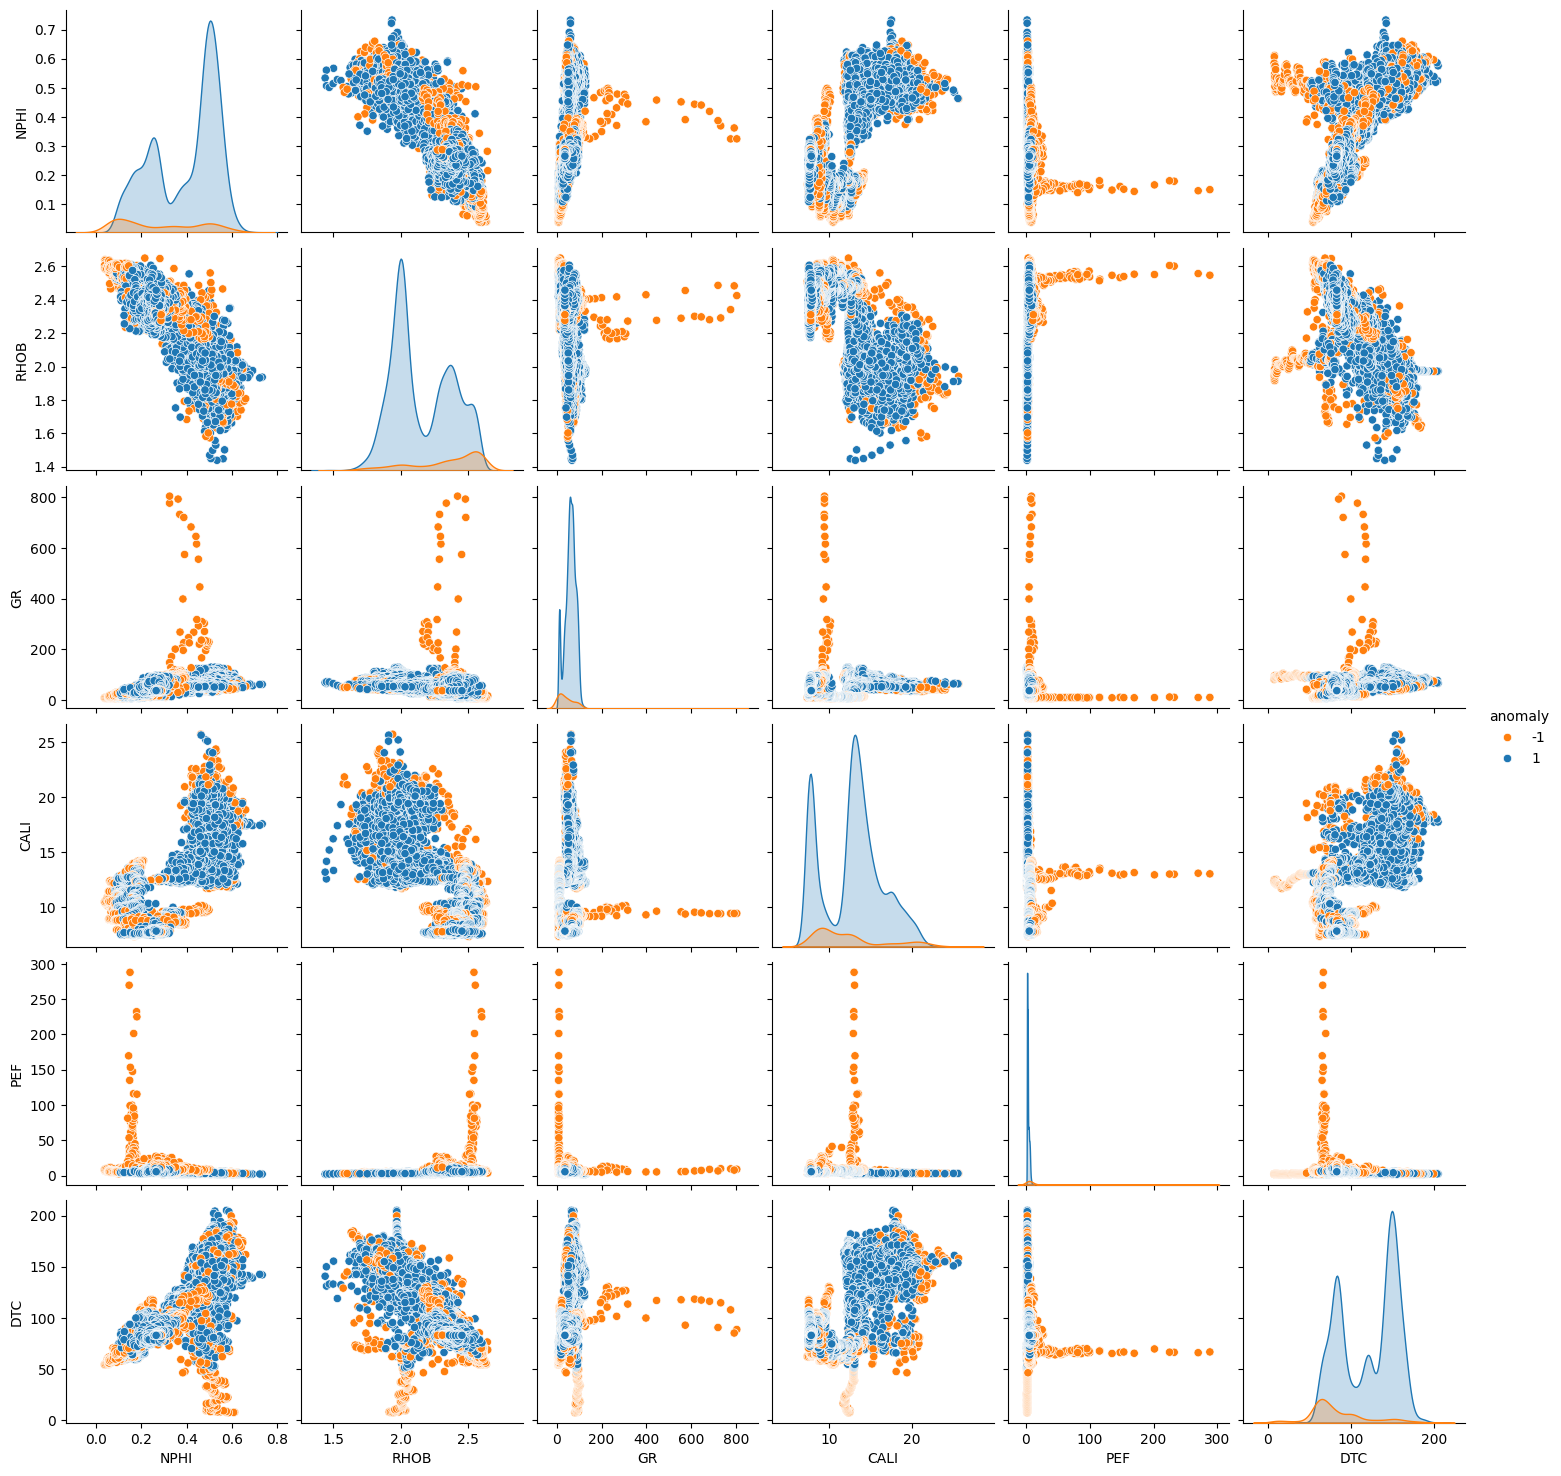

In [ ]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=anomaly_inputs, hue='anomaly', palette=palette)

**Feature Importance by SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.3 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.Explainer(model_IF.predict, df[anomaly_inputs])
shap_values = explainer(df[anomaly_inputs])

ExactExplainer explainer:  90%|████████▉ | 11895/13288 [54:26<08:27,  2.75it/s]

In [ ]:
shap.initjs()

In [ ]:
shap.initjs()
shap.plots.force(shap_values[141])

In [ ]:
df.shape

(13288, 24)

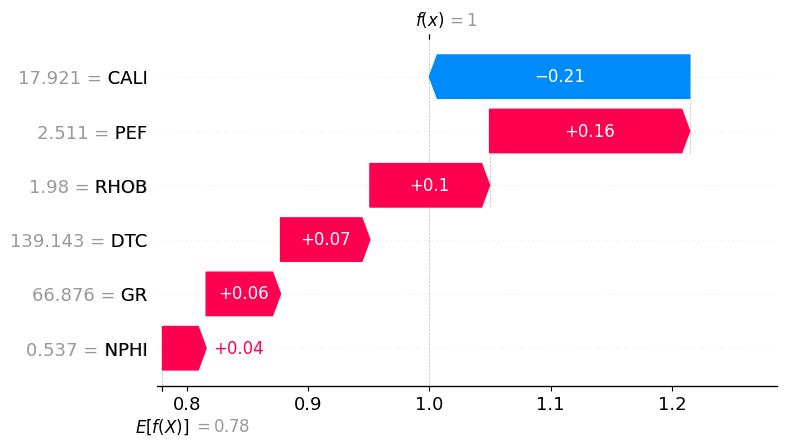

In [ ]:
shap.initjs()
shap.plots.waterfall(shap_values[142])

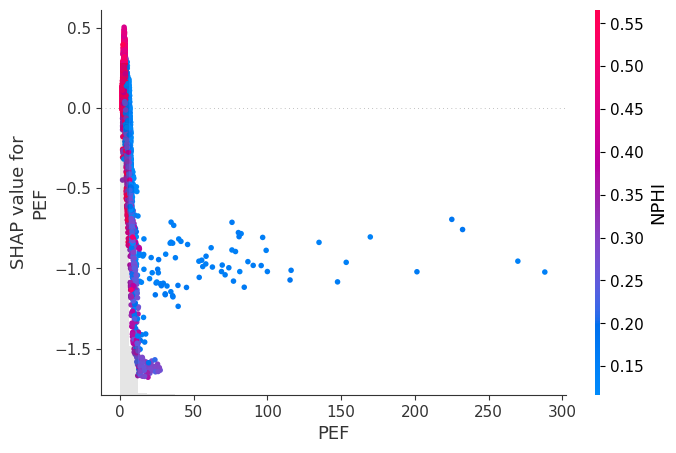

In [ ]:
shap.plots.scatter(shap_values[:,'PEF'], color=shap_values)

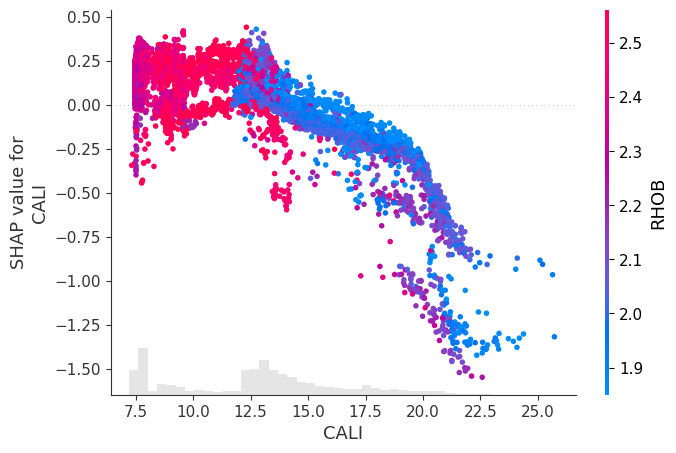

In [ ]:
shap.plots.scatter(shap_values[:,'CALI'], color=shap_values)

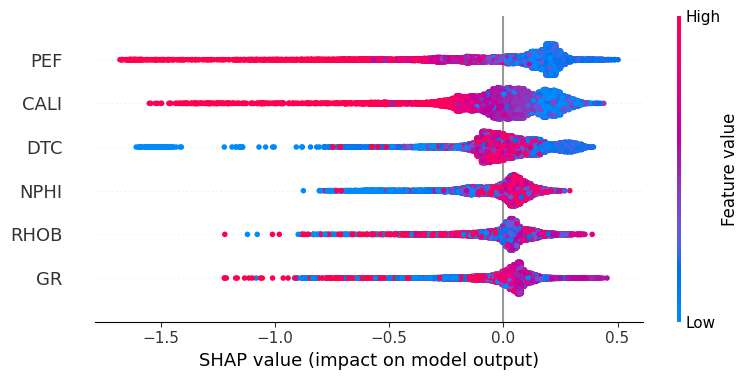

In [ ]:
shap.summary_plot(shap_values, df[anomaly_inputs])

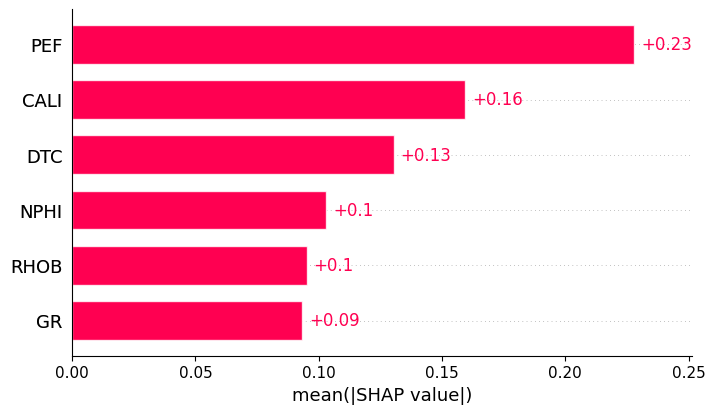

In [ ]:
shap.plots.bar(shap_values,max_display=14)

In [ ]:
import pickle

filename_expl = 'explainer.sav'
pickle.dump(explainer, open(filename_expl, 'wb'))
load_explainer = pickle.load(open(filename_expl, 'rb'))
#print(load_explainer)

filename = 'shapvalues.sav'
pickle.dump(shap_values, open(filename, 'wb'))

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=dbfba115b3be30b82f657a4a28100ab39a2b1c723255c8e3ea3a1d015a2fb996
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

In [ ]:
df[anomaly_inputs].head()

,NPHI,RHOB,GR,CALI,PEF,DTC
DEPT,,,,,,
1149.648,0.541850,2.063168,68.388885,17.482092,2.583011,134.226379
1149.800,0.545401,2.051136,71.170013,17.395611,2.506672,134.824799
1149.952,0.548953,2.041540,74.497498,17.364607,2.427594,135.037079
1150.104,0.549356,2.035698,76.098335,17.371887,2.401553,134.500336
1150.256,0.543351,2.029099,74.966675,17.370705,2.358777,132.162399


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(df[anomaly_inputs].to_numpy(),
mode='classification',training_labels=df['anomaly_scores'],feature_names=anomaly_inputs)


In [ ]:
# iso_scores = abs(model_IF.score_samples(df['anomaly']))
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']
model_IF = IsolationForest(contamination=0.1, random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores'] = model_IF.decision_function(df[anomaly_inputs])
df['anomaly'] = model_IF.predict(df[anomaly_inputs])
if_scores = abs(model_IF.score_samples(df[anomaly_inputs]))

# this is required as LIME requires class probabilities in case of classification example
def prob(data):
  return if_scores

exp = explainer.explain_instance(df[anomaly_inputs].iloc[10], prob, num_features=6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Dependence Plot

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

In [ ]:
clf = model_IF.fit(df[anomaly_inputs])
partial_dependence(clf, df[anomaly_inputs], features=6, kind="average", grid_resolution=5)

In [ ]:
PartialDependenceDisplay.from_estimator(
    model_IF,
    df[anomaly_inputs],
    ['PEF'],
    kind='average',
    target=0
)